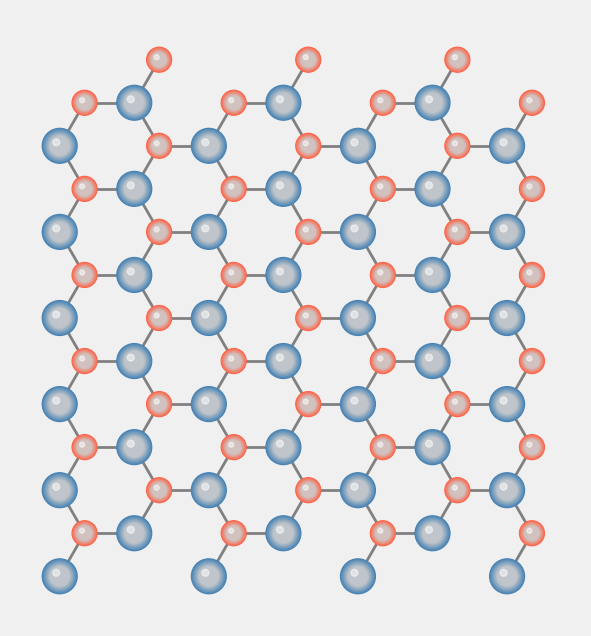

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def draw_atom(ax, x, y, radius=0.4, color_hex='#4169E1'):
    """
    그래데이션 효과가 적용된 단일 원자를 그리는 함수입니다. (수정 없음)
    """
    for i in range(10):
        factor = i / 10.0
        r_base = int(color_hex[1:3], 16) / 255.0
        g_base = int(color_hex[3:5], 16) / 255.0
        b_base = int(color_hex[5:7], 16) / 255.0
        r = r_base * (1 - factor) + factor * 0.8
        g = g_base * (1 - factor) + factor * 0.8
        b = b_base * (1 - factor) + factor * 0.8
        r, g, b = max(0, min(r, 1)), max(0, min(g, 1)), max(0, min(b, 1))
        circle = plt.Circle((x, y), radius * (1 - factor * 0.5), color=(r, g, b), zorder=10)
        ax.add_artist(circle)
    highlight = plt.Circle((x - radius * 0.2, y + radius * 0.2), radius * 0.2, color='white', alpha=0.5, zorder=11)
    ax.add_artist(highlight)

def draw_honeycomb_lattice_different_sizes(ax, nx=5, ny=5, 
                                           color1='#4682B4', radius1=0.35, 
                                           color2='#FF6347', radius2=0.25):
    """
    인접한 두 원자의 색상과 크기가 다른 허니콤 격자를 그리는 함수입니다.
    """
    positions = []
    colors = []    # 원자별 색상을 저장할 리스트
    radii = []     # 원자별 반지름을 저장할 리스트

    # 허니콤 격자의 원자 위치, 색상, 크기를 계산합니다.
    for i in range(nx):
        for j in range(ny):
            # Type A atom (첫 번째 서브격자)
            x_a = i * 1.5
            y_a = j * np.sqrt(3) + (i % 2) * np.sqrt(3) / 2
            positions.append([x_a, y_a])
            colors.append(color1)
            radii.append(radius1) # Type A는 radius1

            # Type B atom (두 번째 서브격자)
            x_b = x_a + 0.5
            y_b = y_a + np.sqrt(3) / 2
            positions.append([x_b, y_b])
            colors.append(color2)
            radii.append(radius2) # Type B는 radius2
            
    positions = np.array(positions)

    # --- 결합 그리기 ---
    dist_matrix = cdist(positions, positions)
    bond_indices = np.where((dist_matrix > 0.9) & (dist_matrix < 1.1))
    
    drawn_bonds = set()
    for i, j in zip(*bond_indices):
        if tuple(sorted((i, j))) not in drawn_bonds:
            p1, p2 = positions[i], positions[j]
            plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='gray', linewidth=2, zorder=5)
            drawn_bonds.add(tuple(sorted((i, j))))

    # --- 원자 그리기 ---
    # 계산된 위치, 색상, 크기로 각 원자를 그립니다.
    for k, pos in enumerate(positions):
        draw_atom(ax, pos[0], pos[1], radius=radii[k], color_hex=colors[k])
        
    return positions

# --- 메인 실행 부분 ---
fig, ax = plt.subplots(figsize=(10, 8))

# 크기와 색상이 다른 허니콤 격자를 그립니다.
# 예: 질화붕소(h-BN) 시각화 - 붕소(B) 원자와 질소(N) 원자는 크기가 다름
positions = draw_honeycomb_lattice_different_sizes(ax, nx=7, ny=6, 
                                                   color1='#4682B4', radius1=0.35, # SteelBlue
                                                   color2='#FF6347', radius2=0.25) # Tomato

# --- 그래프 꾸미기 ---
if positions.size > 0:
    ax.set_xlim(positions[:, 0].min() - 1, positions[:, 0].max() + 1)
    ax.set_ylim(positions[:, 1].min() - 1, positions[:, 1].max() + 1)

ax.set_aspect('equal', adjustable='box')
ax.axis('off')
fig.patch.set_facecolor('#f0f0f0')